In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import os 
print(os.listdir("./los-angeles-traffic-collision-data"))

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

['socrata_metadata.json', 'traffic-collision-data-from-2010-to-present.csv']


In [36]:
#read in data
collision_data = pd.read_csv("./los-angeles-traffic-collision-data/traffic-collision-data-from-2010-to-present.csv")
df = pd.DataFrame(collision_data)
print(df.head(10))

   DR Number            Date Reported            Date Occurred  Time Occurred  \
0  191010770  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1216   
1  190711820  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1445   
2  192011837  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1245   
3  190613201  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1120   
4  191610033  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1015   
5  190410808  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000            630   
6  191312833  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000              1   
7  190711819  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1300   
8  191610034  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1155   
9  191911558  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000             30   

   Area ID    Area Name  Reporting District  Crime Code  \
0       10  West Valley                1009      

In [37]:
#data cleaning 
df = df.drop(['DR Number','Area ID','Reporting District','Crime Code','MO Codes','Premise Code', 'Premise Description'], axis=1)
print(df.head(10))

df['year'] = pd.DatetimeIndex(df['Date Occurred']).year
df['month'] = pd.DatetimeIndex(df['Date Occurred']).month
df['day'] = pd.DatetimeIndex(df['Date Occurred']).day
df['time']=df['year']+(1/12)*df['month']+(1/360)*df['day']

             Date Reported            Date Occurred  Time Occurred  \
0  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1216   
1  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1445   
2  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1245   
3  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1120   
4  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1015   
5  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000            630   
6  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000              1   
7  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1300   
8  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1155   
9  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000             30   

     Area Name Crime Code Description  Victim Age Victim Sex Victim Descent  \
0  West Valley      TRAFFIC COLLISION         NaN          M              O   
1     Wilshire      TRAFFIC COLLISION        51.0          M           

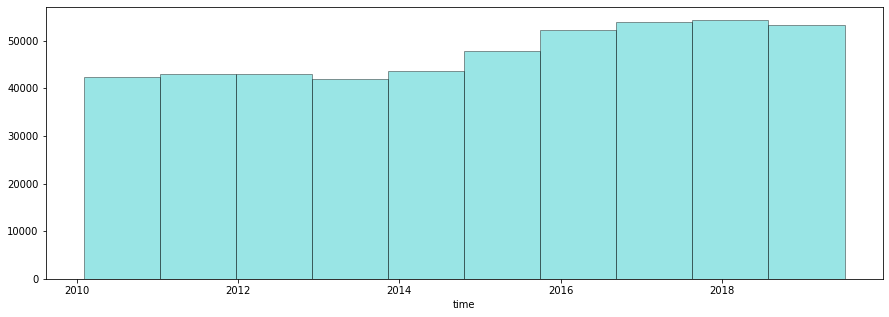

In [38]:
x = df.time
ax = sns.distplot(x, hist=True, kde=False, rug=False, color='c', bins=10,  hist_kws={'edgecolor':'black'})
plt.show()